## Import Data

## Import Retail Sales data 2018-2021

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
df= pd.read_csv(r"C:\Users\rc_sh\OneDrive\Escritorio\AI\Machine_Learning\Adidas\CLHO_sales_data\Sales_detail_report\sales_detail_report.csv", delimiter=";")

In [66]:
df #let's see what's inside our sales dataset

,Store No.,POS Terminal No.,Transaction No.,Date,Shifted Date,VAT %,Area HO Currency Code,Net Amount,VAT Amount,Item No.,Size Description
0,CL104,CL10401,180560,01/02/18,nan,19,CLP,"27,723.00","5,267.00",BY1610,8
1,CL104,CL10401,180563,01/02/18,nan,19,CLP,"-52,933.00","-10,057.00",BA8899,9-
2,CL104,CL10401,180564,01/02/18,nan,19,CLP,"52,933.00","10,057.00",BA8899,8-
3,CL104,CL10401,180569,01/02/18,nan,19,CLP,"13,437.00","2,553.00",BQ0759,XL
4,CL104,CL10401,180570,01/02/18,nan,19,CLP,"39,487.00","7,503.00",BQ4533,XL
...,...,...,...,...,...,...,...,...,...,...,...
11793723,CL910,CL91003,21778,12/31/21,nan,19,CLP,252.00,48.00,S49975,NS
11793724,CL910,CL91003,21779,12/31/21,nan,19,CLP,"25,202.00","4,788.00",GU1738,NS
11793725,CL910,CL91003,21779,12/31/21,nan,19,CLP,252.00,48.00,S49975,NS
11793726,CL910,CL91003,21780,12/31/21,nan,19,CLP,"54,613.00","10,377.00",FX5118,9


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11793728 entries, 0 to 11793727
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Store No.              object 
 1   POS Terminal No.       object 
 2   Transaction No.        int64  
 3   Date                   object 
 4   Shifted Date           float64
 5   VAT %                  int64  
 6   Area HO Currency Code  object 
 7   Net Amount             object 
 8   VAT Amount             object 
 9   Item No.               object 
 10  Size Description       object 
dtypes: float64(1), int64(2), object(8)
memory usage: 989.8+ MB


In [68]:
df.columns

Index(['Store No.', 'POS Terminal No.', 'Transaction No.', 'Date',
       'Shifted Date', 'VAT %', 'Area HO Currency Code', 'Net Amount',
       'VAT Amount', 'Item No.', 'Size Description'],
      dtype='object')

### Convert date to date object

In [69]:
df['Date']= pd.to_datetime(df['Date'])

In [70]:
df.dtypes

Store No.                        object
POS Terminal No.                 object
Transaction No.                   int64
Date                     datetime64[ns]
Shifted Date                    float64
VAT %                             int64
Area HO Currency Code            object
Net Amount                       object
VAT Amount                       object
Item No.                         object
Size Description                 object
dtype: object

### Rename columns

In [71]:
df.rename(columns={"Store No.":"store","POS Terminal No.":"pos","Transaction No.":"transaction","Date":"date","Shifted Date":"shifted_date","VAT %":"vat","Area HO Currency Code":"currency","Net Amount":"net_amount","VAT Amount":"vat_amount","Item No.":"item","Size Description":"size"}, inplace=True)

In [72]:
df["transaction"] = df["transaction"].astype(str)

In [73]:
#let's add a new column combining item SKU and article size

df["item_size"] =df["item"] +"_"+ df["size"]

#let's add a new column combining item pos and transaction

df["unique_transaction"] =df["pos"] +"_"+ df["transaction"]

In [74]:
df.dtypes

store                         object
pos                           object
transaction                   object
date                  datetime64[ns]
shifted_date                 float64
vat                            int64
currency                      object
net_amount                    object
vat_amount                    object
item                          object
size                          object
item_size                     object
unique_transaction            object
dtype: object

In [12]:
df

,store,pos,transaction,date,shifted_date,vat,currency,net_amount,vat_amount,item,size,item_size,unique_transaction
0,CL104,CL10401,180560,2018-01-02,NaN,19,CLP,"27,723.00","5,267.00",BY1610,8,BY1610_8,CL10401_180560
1,CL104,CL10401,180563,2018-01-02,NaN,19,CLP,"-52,933.00","-10,057.00",BA8899,9-,BA8899_9-,CL10401_180563
2,CL104,CL10401,180564,2018-01-02,NaN,19,CLP,"52,933.00","10,057.00",BA8899,8-,BA8899_8-,CL10401_180564
3,CL104,CL10401,180569,2018-01-02,NaN,19,CLP,"13,437.00","2,553.00",BQ0759,XL,BQ0759_XL,CL10401_180569
4,CL104,CL10401,180570,2018-01-02,NaN,19,CLP,"39,487.00","7,503.00",BQ4533,XL,BQ4533_XL,CL10401_180570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11793723,CL910,CL91003,21778,2021-12-31,NaN,19,CLP,252.00,48.00,S49975,NS,S49975_NS,CL91003_21778
11793724,CL910,CL91003,21779,2021-12-31,NaN,19,CLP,"25,202.00","4,788.00",GU1738,NS,GU1738_NS,CL91003_21779
11793725,CL910,CL91003,21779,2021-12-31,NaN,19,CLP,252.00,48.00,S49975,NS,S49975_NS,CL91003_21779
11793726,CL910,CL91003,21780,2021-12-31,NaN,19,CLP,"54,613.00","10,377.00",FX5118,9,FX5118_9,CL91003_21780


In [13]:
df.dtypes

store                         object
pos                           object
transaction                   object
date                  datetime64[ns]
shifted_date                 float64
vat                            int64
currency                      object
net_amount                    object
vat_amount                    object
item                          object
size                          object
item_size                     object
unique_transaction            object
dtype: object

In [14]:
#Lets delete the "," as a thousand separator
df["net_amount"] = [float(str(i).replace(",", "")) for i in df["net_amount"]]
df["vat_amount"] = [float(str(i).replace(",", "")) for i in df["vat_amount"]]
#To convert columns into float
df.astype({'net_amount': 'float'}).dtypes
df.astype({'vat_amount': 'float'}).dtypes

store                         object
pos                           object
transaction                   object
date                  datetime64[ns]
shifted_date                 float64
vat                            int64
currency                      object
net_amount                   float64
vat_amount                   float64
item                          object
size                          object
item_size                     object
unique_transaction            object
dtype: object

### Hot selling  items

In [15]:
hot_items = df['item_size'].value_counts()[0:10]

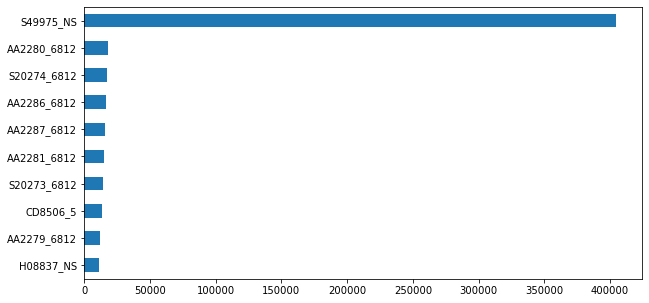

In [16]:
hot_items.plot.barh(figsize=(10,5)).invert_yaxis()

In [17]:
hot_items

S49975_NS      404142
AA2280_6812     18098
S20274_6812     17711
AA2286_6812     16753
AA2287_6812     15897
AA2281_6812     14685
S20273_6812     14015
CD8506_5        13847
AA2279_6812     12028
H08837_NS       11228
Name: item_size, dtype: int64

### N° of sales Transactions

In [18]:
df["unique_transaction"].nunique()

6570535

In [19]:
#Number of sales
print(len(df.loc[df["net_amount"]>0 ]))


11034645


In [20]:
#Number of returns
print(len(df.loc[df["net_amount"]<0 ]))

737591


### N° of sales Transactions per store

In [21]:
store_transactions = df.groupby(['store'])[['unique_transaction']].nunique().sort_values(['unique_transaction'],ascending=False)

<AxesSubplot:xlabel='store'>

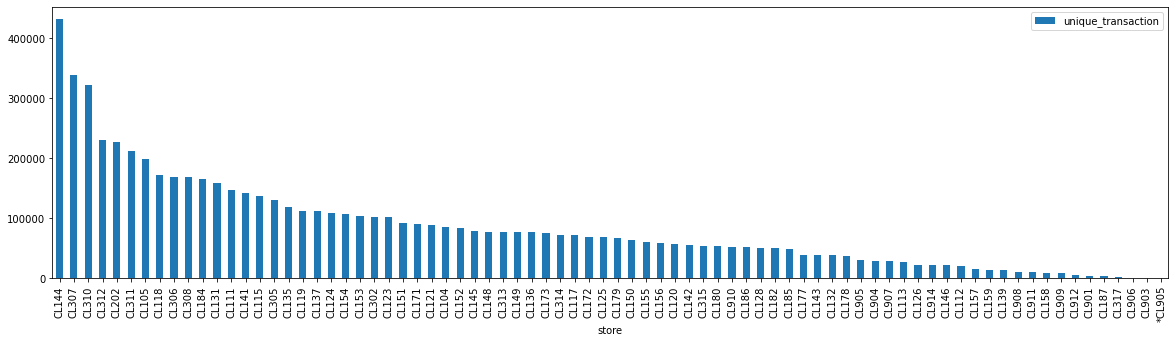

In [22]:
store_transactions.plot.bar(figsize=(20,5))

### N° of items sold per store

In [23]:
df['store'].value_counts()[0:10]

CL307    802948
CL310    764430
CL144    729577
CL312    490374
CL311    461832
CL202    453892
CL105    335789
CL306    324936
CL308    310145
CL118    305068
Name: store, dtype: int64

<AxesSubplot:>

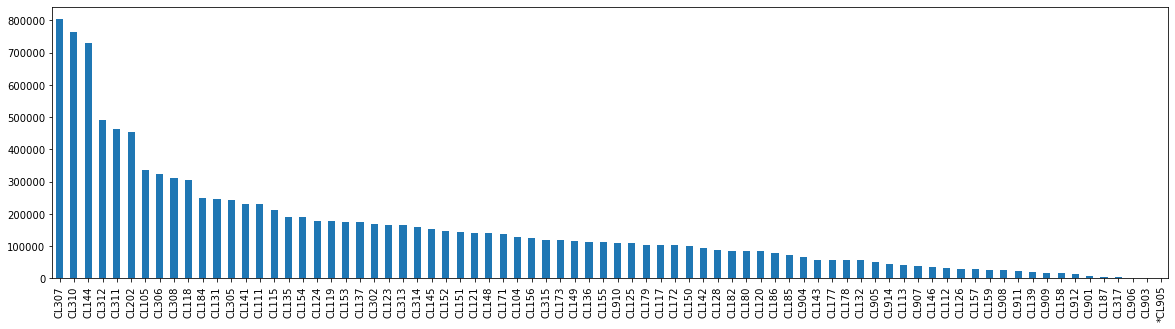

In [24]:
df['store'].value_counts().plot.bar(figsize=(20,5))

## Stores with higher sales (Net Amount)

In [25]:
store_sales = df.groupby(['store'])[['net_amount']].agg('sum').sort_values(['net_amount'],ascending=False)

<AxesSubplot:xlabel='store'>

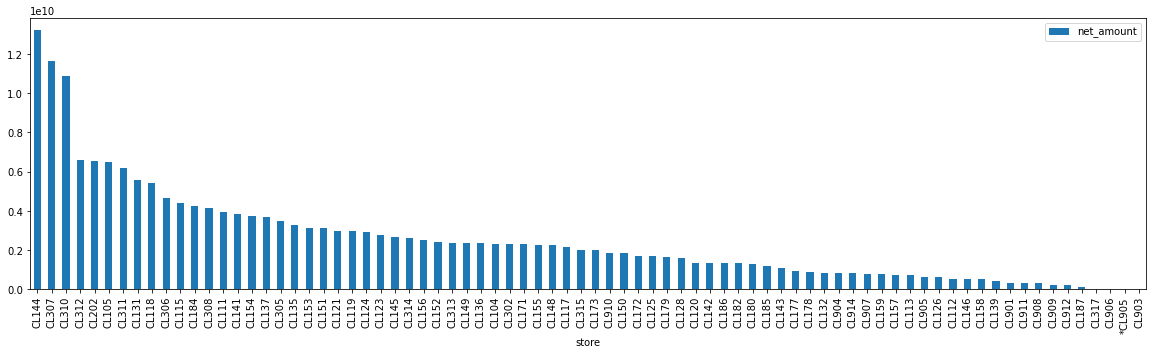

In [26]:
store_sales.plot.bar(figsize=(20,5))

In [75]:
#To supress scientific notation
pd.options.display.float_format = '{:.2f}'.format
store_sales

,net_amount
store,
CL144,13200341816.00
CL307,11622081377.00
CL310,10880107624.00
CL312,6582225020.00
CL202,6563759982.00
...,...
CL187,94951793.00
CL317,39092144.00
CL906,2123348.00


## Bags per transaction

In [28]:
sold_bags = len(df.loc[df['item'] == 'S49975'])

In [29]:
transactions = df['unique_transaction'].nunique()


In [30]:
sold_bags/transactions # maybe the sku of bags changed 

0.06150823334781719

### Average net amount per transaction

In [31]:
average_sale = df.groupby(['unique_transaction'])[['net_amount']].agg('mean').sort_values(['net_amount'],ascending=False)
#average_sale

In [32]:
total_average_sale = df.groupby(['unique_transaction'])[['net_amount']].agg('mean').sort_values(['net_amount'],ascending=False)
#total_average_sale

In [33]:
total_average_sale.agg('mean')

net_amount   16714.10
dtype: float64

### Average item sold per transaction


Plot number of sales of a specific article vs time


group by article by day

In [34]:
articles_by_day = df.groupby(df['item_size'] == 'S49975_NS').count()

In [35]:
articles_by_day

,store,pos,transaction,date,shifted_date,vat,currency,net_amount,vat_amount,item,size,item_size,unique_transaction
item_size,,,,,,,,,,,,,
False,11389586,11389586,11389586,11389586,0,11389586,11389586,11389586,11389586,11389586,11389586,11389586,11389586
True,404142,404142,404142,404142,0,404142,404142,404142,404142,404142,404142,404142,404142


In [36]:
counts_S49975_NS = df[df['item_size'].isin(['S49975_NS'])].groupby('date').sum()

<AxesSubplot:xlabel='date'>

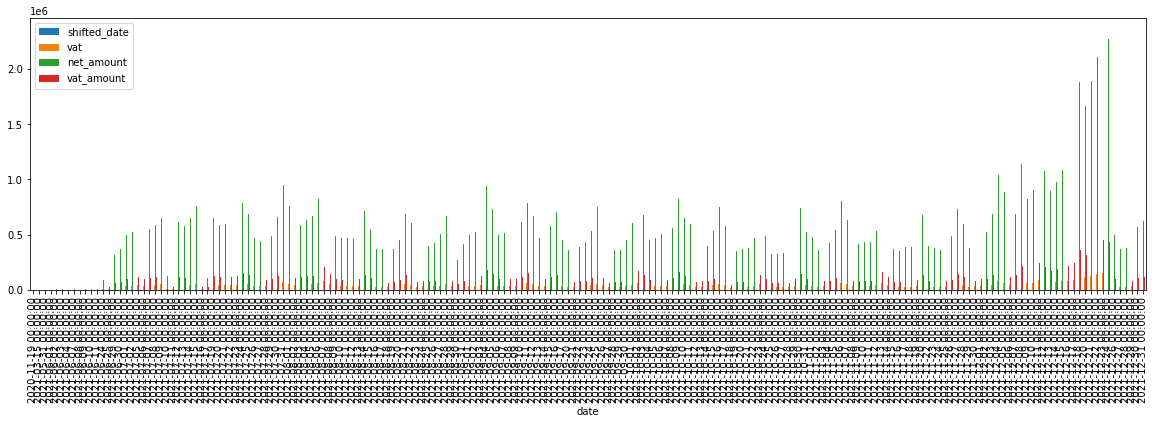

In [37]:
counts_S49975_NS.plot.bar(figsize=(20,5))

In [38]:
counts_S49975_NS

,shifted_date,vat,net_amount,vat_amount
date,,,,
2020-11-19,0.00,19,210.00,40.00
2021-03-15,0.00,19,252.00,48.00
2021-05-31,0.00,133,1764.00,336.00
2021-06-01,0.00,285,3780.00,720.00
2021-06-02,0.00,190,2520.00,480.00
...,...,...,...,...
2021-12-27,0.00,26657,370428.00,70557.00
2021-12-28,0.00,27151,374875.00,71405.00
2021-12-29,0.00,30514,422112.00,80403.00


In [39]:
#store_sales = df.groupby(['date'].dt.year)[['net_amount']].agg('sum').sort_values(['net_amount'],ascending=False)

### Total sales by year

In [40]:
store_sales_year=df.groupby(df.date.dt.year)[['net_amount']].agg('sum').sort_values(['date'],ascending=True)

<AxesSubplot:xlabel='date'>

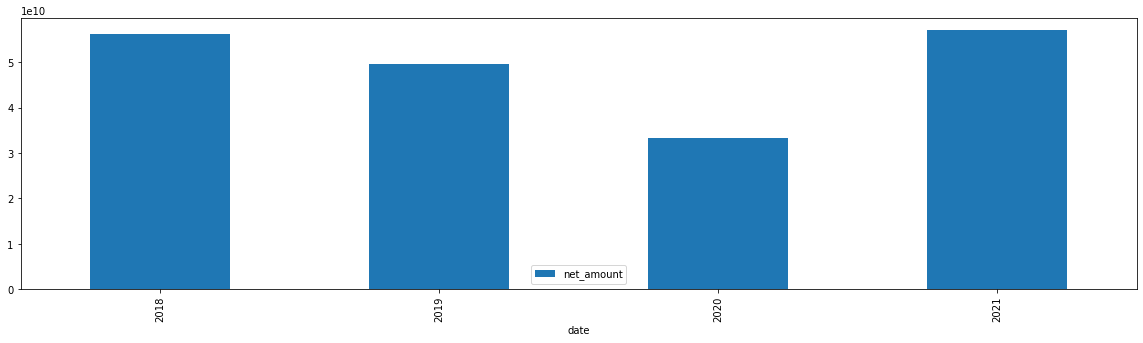

In [41]:
store_sales_year.plot.bar(figsize=(20,5))

In [42]:
store_sales_year

,net_amount
date,
2018,56075797340.00
2019,49640444241.00
2020,33301871021.00
2021,56968529768.00


### Total sales by month


In [43]:
store_sales_month=df.groupby(df.date.dt.month)[['net_amount']].agg('sum').sort_values(['date'],ascending=True)

<AxesSubplot:xlabel='date'>

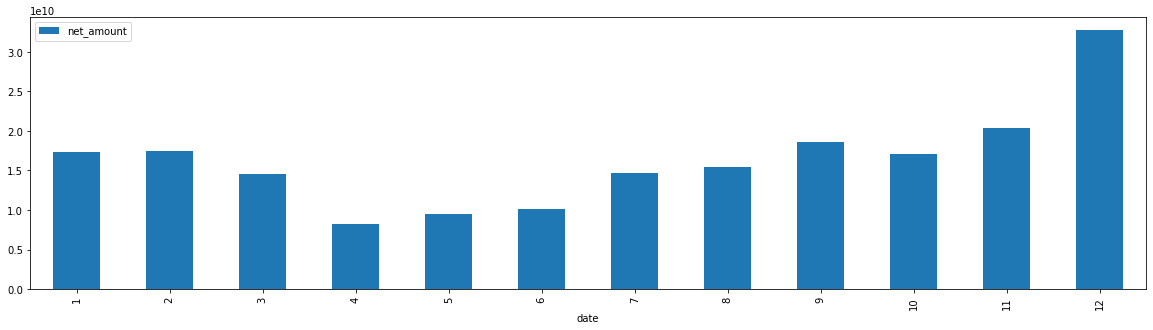

In [44]:
store_sales_month.plot.bar(figsize=(20,5))

In [45]:
store_sales_month

,net_amount
date,
1,17308308211.00
2,17485261257.00
3,14495535694.00
4,8191383047.00
5,9519748863.00
6,10105807047.00
7,14641602427.00
8,15457303153.00
9,18550996065.00


### Transactions by month

<AxesSubplot:xlabel='date'>

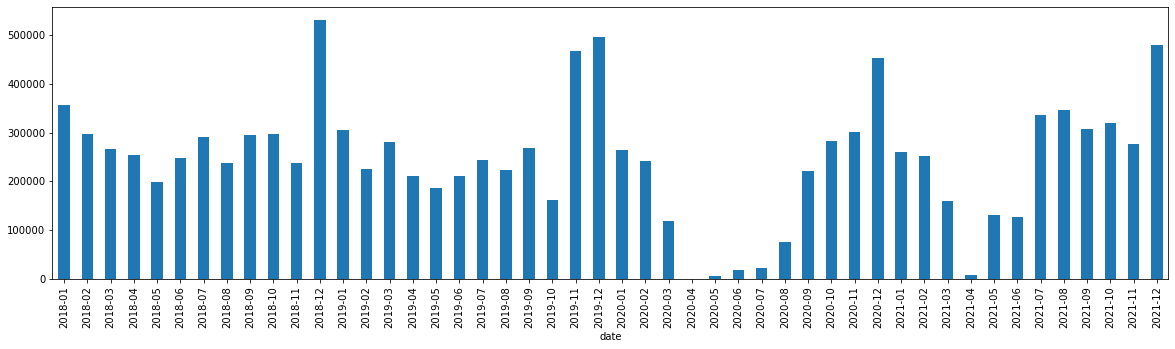

In [76]:
df = df.groupby(df['date'].dt.to_period('M')).count()
df = df.resample('M').asfreq().fillna(0)
df.unique_transaction.plot(figsize=(20,5),kind='bar')

### Sales by month and year

In [46]:

df = df.groupby(df['date'].dt.to_period('M')).sum()
df = df.resample('M').asfreq().fillna(0)

<AxesSubplot:xlabel='date'>

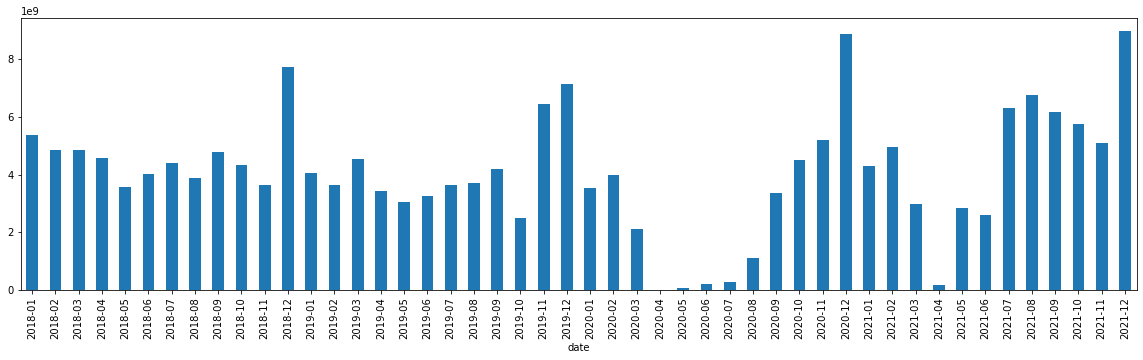

In [47]:
df.net_amount.plot(figsize=(20,5),kind='bar')


In [48]:
df.net_amount


date
2018-01   5370389293.00
2018-02   4866856684.00
2018-03   4870822254.00
2018-04   4581535920.00
2018-05   3567313725.00
2018-06   4014537551.00
2018-07   4415839587.00
2018-08   3880818799.00
2018-09   4785892552.00
2018-10   4341642567.00
2018-11   3649487949.00
2018-12   7730660459.00
2019-01   4072905576.00
2019-02   3645964186.00
2019-03   4533252012.00
2019-04   3424723612.00
2019-05   3065112239.00
2019-06   3275503981.00
2019-07   3651192143.00
2019-08   3707659492.00
2019-09   4201674144.00
2019-10   2481415238.00
2019-11   6440221696.00
2019-12   7140819922.00
2020-01   3550445650.00
2020-02   3999589890.00
2020-03   2112108077.00
2020-04            0.00
2020-05     60983348.00
2020-06    215950361.00
2020-07    277653567.00
2020-08   1104449658.00
2020-09   3376335024.00
2020-10   4507319478.00
2020-11   5213103367.00
2020-12   8883932601.00
2021-01   4314567692.00
2021-02   4972850497.00
2021-03   2979353351.00
2021-04    185123515.00
2021-05   2826339551.00
2021-06   2

transactions by month

In [51]:
transactions
transactions = df['unique_transaction'].nunique()

6570535

In [64]:
df.dtypes

shifted_date    float64
vat             float64
net_amount      float64
vat_amount      float64
dtype: object

AttributeError: 'DataFrame' object has no attribute 'unique_transaction'